## Reece Wayt
## Spring 2023 
### Exam 1 Lab
### 5/10/2023

#### Program Description: 
This program will output a stress-strain curve using the data set from tensile_test_data.csv. Strain will be the x-component and stress will be the y-component. Libaries numpy, matplotlib, and pandas are used. Specifically, pandas are used to read and create a data frame from tensile data. Numpy arrays are then used to store data as variables for force, deltaL, stress, and strain. Matplotlib is used to display a line graph to visually represent the stress-strain relationship. 

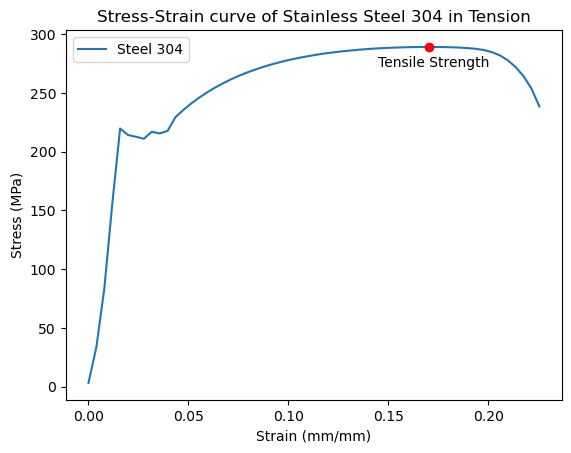

The tensile strength of the sample is 289.1 MPa

The tensile strength is reached at a strain of 0.17 mm/mm


In [1]:
#part 1: library and data import

import numpy as np  #imports for libraries and tells jupyter to display graph inside notebook
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

df = pd.read_csv('tensile_test_data.csv', header=None) #reading file into notebook as a dataframe
data = np.array(df) #creating an array from dataframe

#part 2: variable assignment and computation

force = data[:,1]
deltaL = data[:,2]

def stress_calc (force): #function for computing stress
    A_o =  72.57
    stress = force / A_o
    return stress

def strain_calc (deltaL): #function for computing strain
    L0 = 106.98
    strain = deltaL / L0
    return strain

stress = np.array(stress_calc(force)) #stores stress function data so they can be used in graph
strain = np.array(strain_calc(deltaL)) #stores strain function data

#part 3: graphing data set

fig, ax = plt.subplots()  #create a figure and 'ax' object for subplots
ax.plot(strain, stress) #creates line plot 

ax.set_title('Stress-Strain curve of Stainless Steel 304 in Tension') #attributes and lables for graph
ax.set_xlabel('Strain (mm/mm)')
ax.set_ylabel('Stress (MPa)')
ax.legend(['Steel 304'])   

max_stress = stress.max() #find max value in stress np.array
max_loc = np.argmax(stress) # locates index of max stress
strain_at_ts = strain[43] # index of max stress is used to find corresponding strain

ax.plot(strain_at_ts, max_stress, 'ro')  # plots the point where tesile strength is reached
ax.annotate('Tensile Strength', xy=(strain_at_ts,max_stress), xytext=(0.145,272)) #label for tensile strength point

plt.show()  #tells program to display plot

#part 4: Displaying tensile strength to user

print("The tensile strength of the sample is", round(max_stress,1),"MPa")
print()
print("The tensile strength is reached at a strain of", round(strain_at_ts,3),"mm/mm") #prints to user